In [1]:
import pandas as pd
import numpy as np
import glob
import torchaudio
from torchaudio import transforms
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
METADATA_FILE = 'data/metadata_compiled.csv'
metadata_df = pd.read_csv(METADATA_FILE)

# Part 1: Explore the dataset through code

## a. How many samples does the dataset contain?

In [3]:
sample_count = metadata_df.shape[0]

print(f'Dataset contains {sample_count} samples in total.')

Dataset contains 27550 samples in total.


## b. How many classes? How many images per class? Show a histogram of the number of instances per class.

In [4]:
print('Columns in metadata file:', len(metadata_df.columns))
metadata_df.columns

Columns in metadata file: 51


Index(['uuid', 'datetime', 'cough_detected', 'SNR', 'latitude', 'longitude',
       'age', 'gender', 'respiratory_condition', 'fever_muscle_pain', 'status',
       'quality_1', 'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1',
       'choking_1', 'congestion_1', 'nothing_1', 'diagnosis_1', 'severity_1',
       'quality_2', 'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2',
       'choking_2', 'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2',
       'quality_3', 'cough_type_3', 'dyspnea_3', 'wheezing_3', 'stridor_3',
       'choking_3', 'congestion_3', 'nothing_3', 'diagnosis_3', 'severity_3',
       'quality_4', 'cough_type_4', 'dyspnea_4', 'wheezing_4', 'stridor_4',
       'choking_4', 'congestion_4', 'nothing_4', 'diagnosis_4', 'severity_4'],
      dtype='object')

In [5]:
metadata_df['status'].value_counts()

healthy        12479
symptomatic     2590
COVID-19        1155
Name: status, dtype: int64

From the 51 cloums we only focused on the `status` column. We can see that there are 3 classes (`healthy`, `symptomatic` and `COVID-19`) in the dataset. The number of images per class is shown in the histogram below.

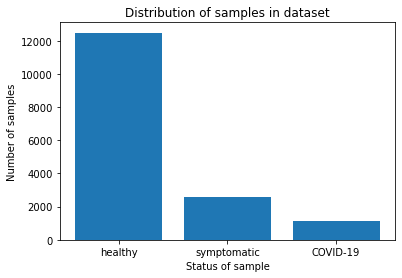

In [8]:
plt.bar(metadata_df['status'].value_counts().index, metadata_df['status'].value_counts().values)

plt.title('Distribution of samples in dataset')
plt.xlabel('Status of sample')
plt.ylabel('Number of samples')

plt.show()

## d. Describe if/how you think the data distribution will affect training of a classifier

The data-set distribution is not equally distributed as there is a significantly greater amount of healthy data points than with covid and symptomatic. This will likely make it have a bias towards healthy samples.

## e. Decide what part of the dataset to use; all, some classes, some samples. Motivate your choice.
Experimenting with different variations of data-set distributions:

- 77.3% Healthy, 6.2% Covid-19, 16.5% Symptomatic (link)
    - Training Accuracy: 75%
    - Validation Accuracy: 75%
    - Testing Accuracy: 75%


During the training the model attempted to guess the data-points to be healthy. It was therefore chosen to reduce the data-set to prevent this from happening. The adjusted split is: 